A neural network to predict whether a patient has diabetes.

## Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

## Load the dataset into a Pandas dataframe

In [ ]:
diabetes_df = pd.read_csv('/content/diabetes.csv', delimiter=',')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* The dataset does not have any missing data.

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Basic Visualization
A heat map is a data visualization technique that represents values using colors. It helps identify patterns, correlations, and trends in large datasets by using color intensity to indicate different magnitudes.





*   X and Y Axes → Represent different variables (e.g., features in a dataset).
*   Color Intensity → Indicates value magnitude (darker/brighter colors for higher values, lighter colors for lower values).
* Color Scale (Legend) → Helps interpret the mapped values.



<Axes: >

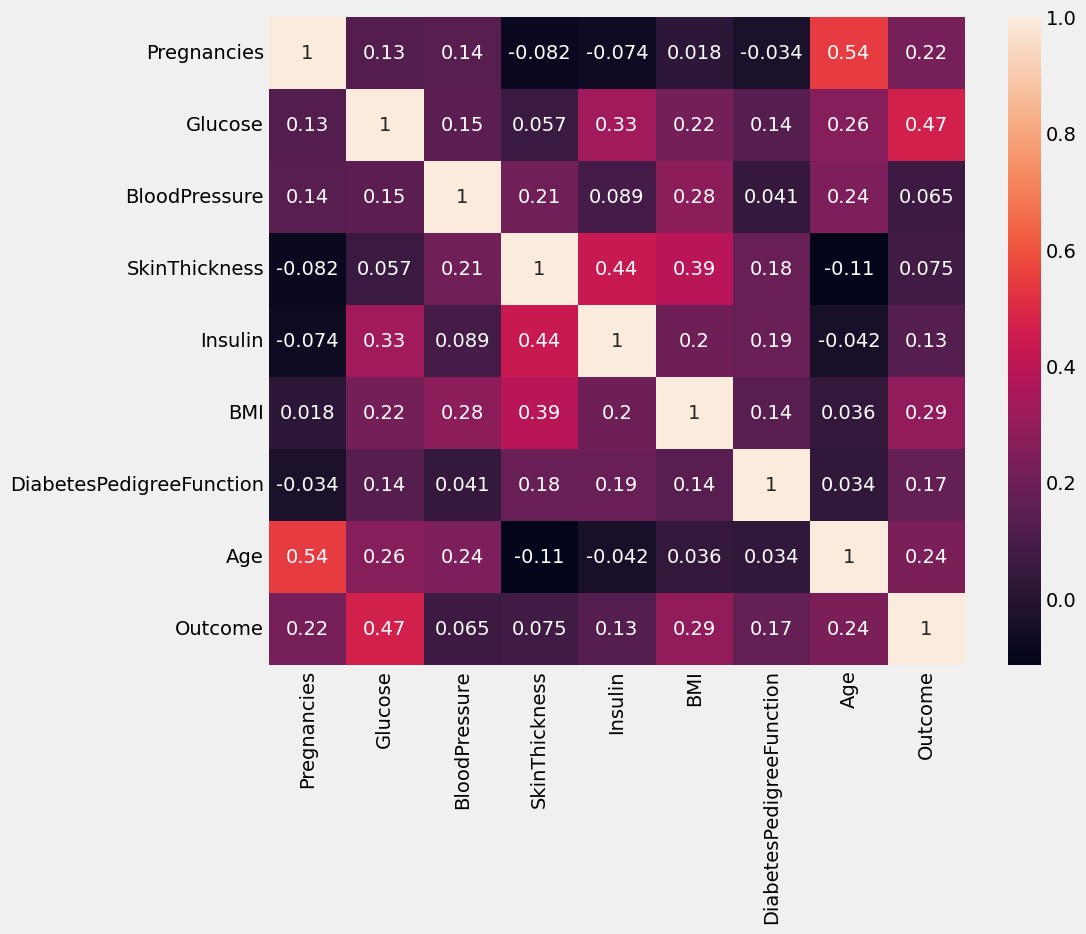

In [ ]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(diabetes_df.corr(), annot=True, ax=ax)

* Glucose levels had the highest effect on the outcome.
* As expected, pregnancies were correlated to age.

A count plot is a type of bar plot that shows the count (frequency) of observations in each category of a categorical variable. It is useful for visualizing categorical distributions and spotting class imbalances.


*   X-Axis: Represents different categories of the categorical variable.
*   Y-Axis: Represents the count (number of occurrences) of each category.
* Bars: Show the frequency of each category.


<Axes: xlabel='Outcome', ylabel='count'>

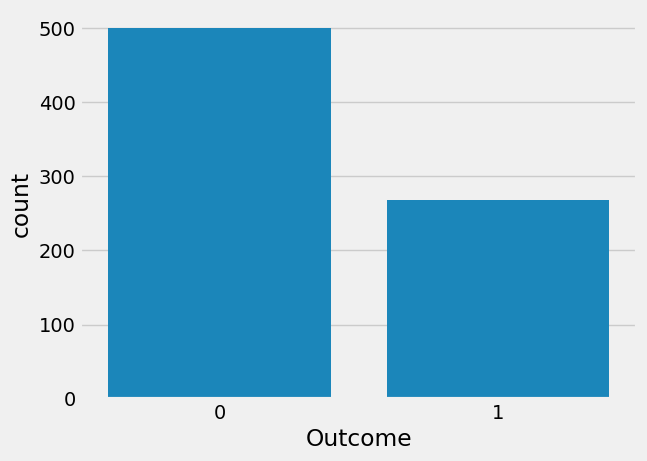

In [ ]:
sns.countplot(x=diabetes_df.Outcome)

A violin plot is a data visualization that combines aspects of a box plot and a kernel density plot. It provides a detailed view of the distribution of a dataset, making it useful for comparing multiple distributions at once.

*   A central box plot – Shows median, quartiles (Q1, Q3), and outliers.
*   A density plot on both sides – Represents the probability density of the data at different values.
* Width of the violin – Indicates how frequently values appear (wider means more data points).


<Axes: xlabel='Outcome', ylabel='Age'>

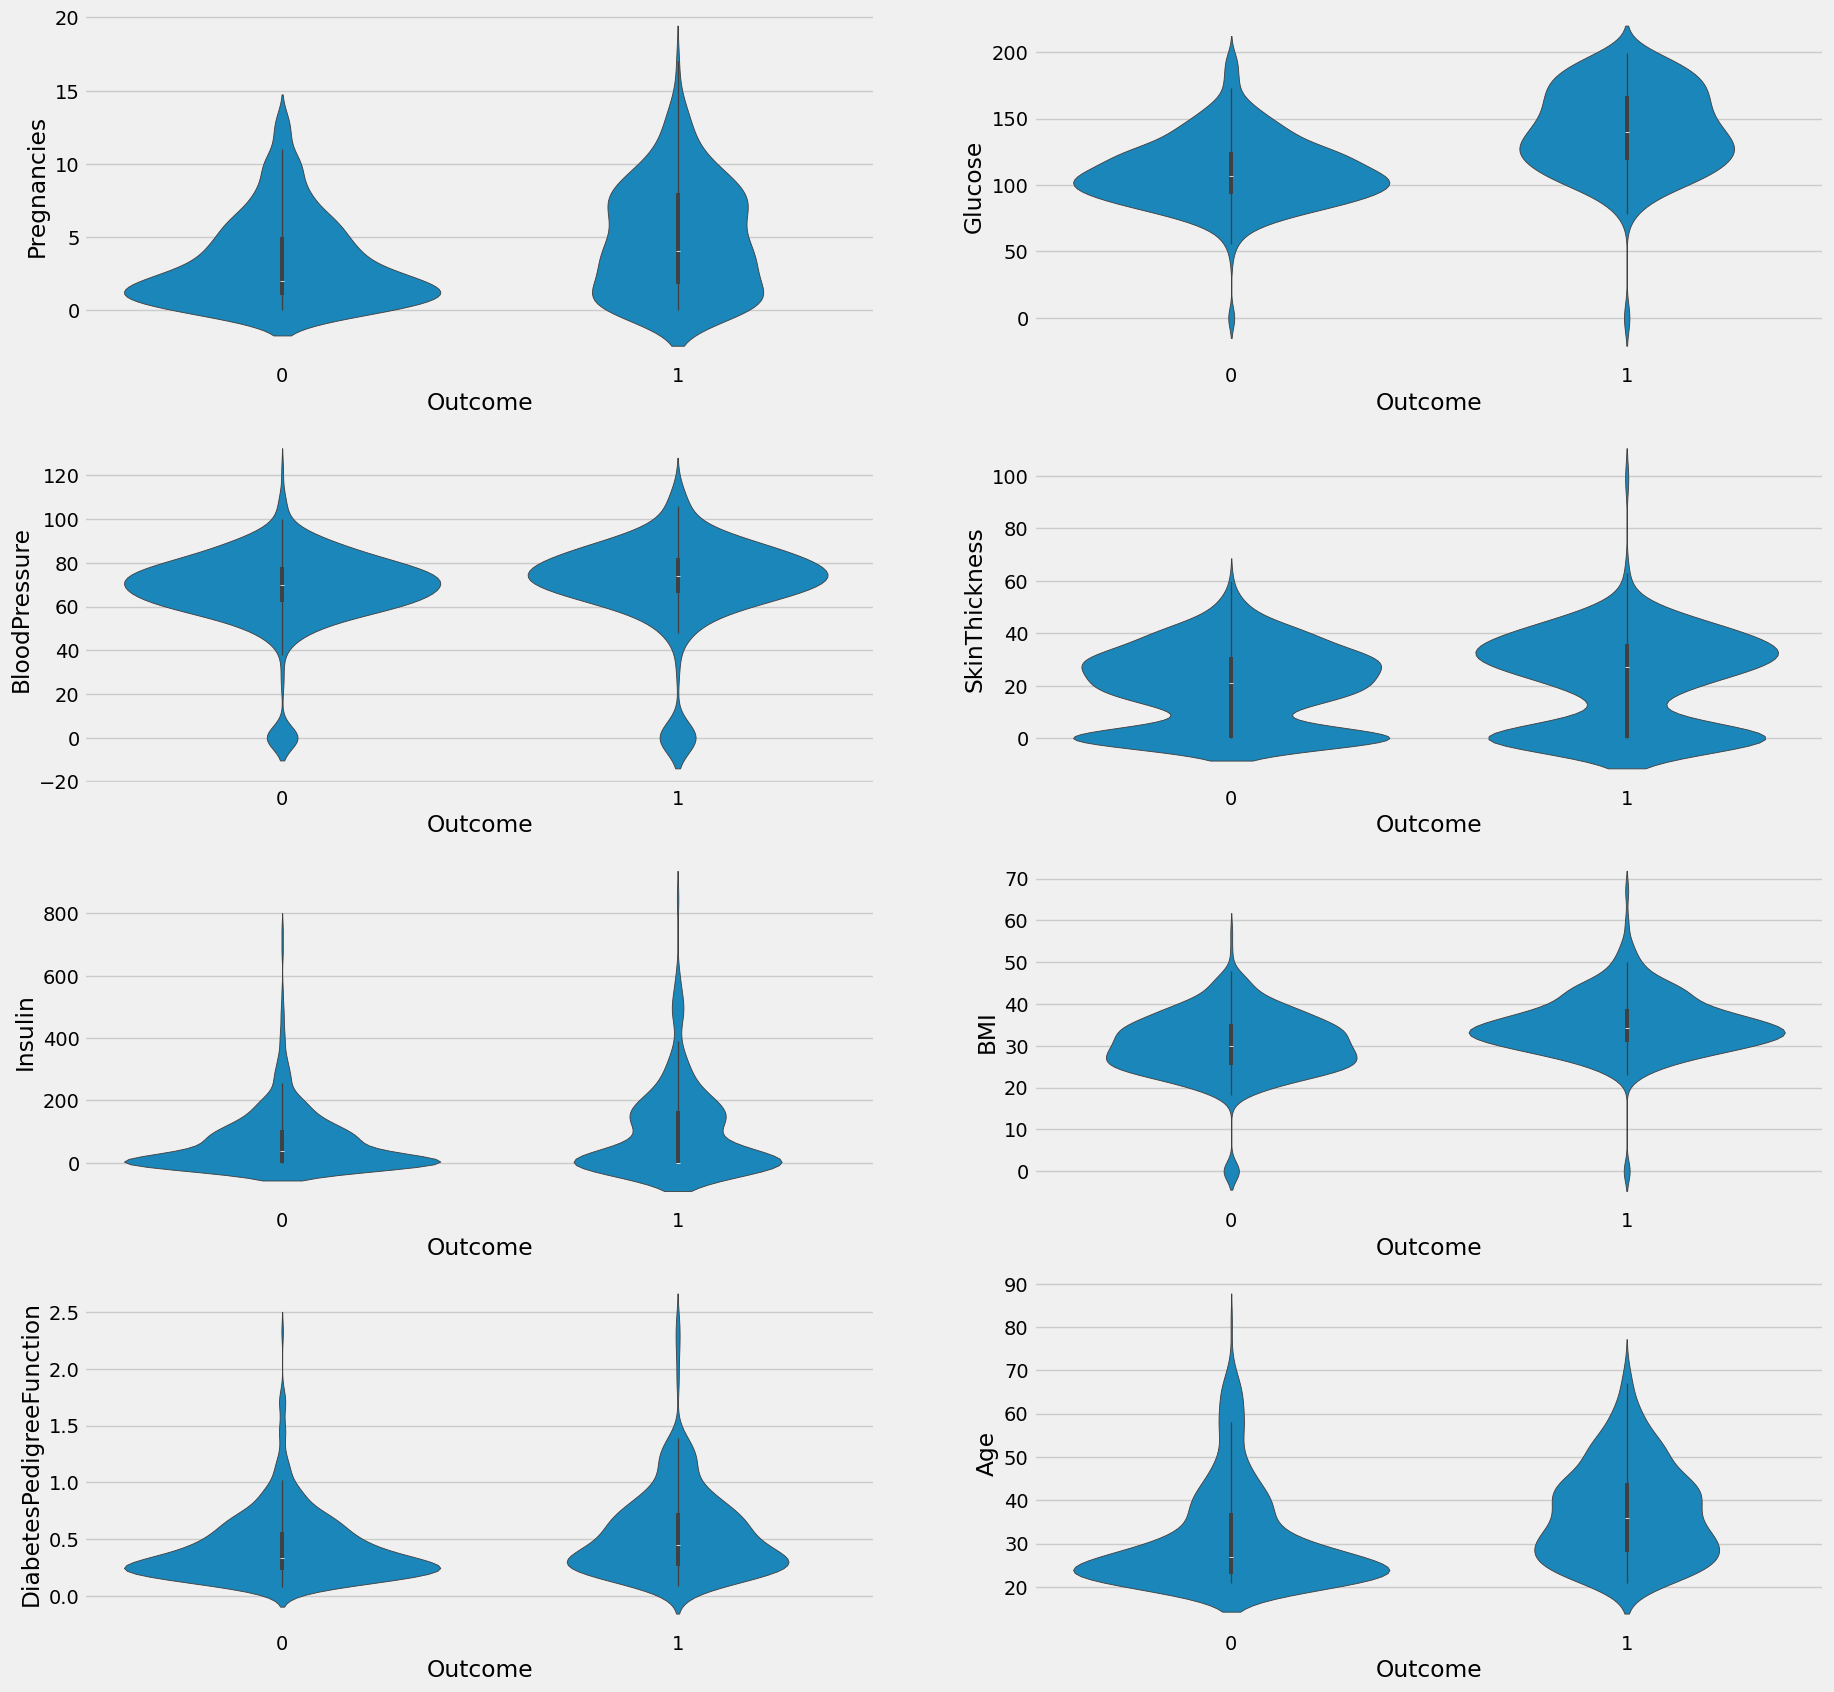

In [ ]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Pregnancies, ax=axes[0,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Glucose, ax=axes[0,1])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.BloodPressure, ax=axes[1,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.SkinThickness, ax=axes[1,1])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Insulin, ax=axes[2,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.BMI, ax=axes[2,1])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.violinplot(x=diabetes_df.Outcome ,y=diabetes_df.Age, ax=axes[3,1])

In [ ]:
column_names = diabetes_df.columns
column_names = column_names.drop('Outcome')
for name in column_names:
    print('{}\n'.format(name))
    print(diabetes_df.groupby(['Outcome'])[name].mean())
    print('*'*50)
    print()

Pregnancies

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
**************************************************

Glucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
**************************************************

BloodPressure

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
**************************************************

SkinThickness

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
**************************************************

Insulin

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64
**************************************************

BMI

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
**************************************************

DiabetesPedigreeFunction

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
**************************************************

Age

Outcome
0    31.190000
1    37.067

* In the dataset, people diagnosed with diabetes had higher values for every attribute (mean value).

A density plot is a smoothed version of a histogram that represents the distribution of a continuous numerical variable. It estimates the probability density function (PDF) of the variable, helping to visualize its distribution shape.





*   X-Axis → Represents the variable’s values.
*   Y-Axis → Represents the density (not absolute counts).
* Kernel Density Estimation (KDE) → Smoothes the distribution using Gaussian kernels.


<ipython-input-11-98e0e558ae35>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Pregnancies, ax=axes[0,0])
<ipython-input-11-98e0e558ae35>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Glucose, ax=axes[0,1])
<ipython-input-11-98e0e558ae35>:4: UserWarning: 

`distplot`

<Axes: xlabel='Age', ylabel='Density'>

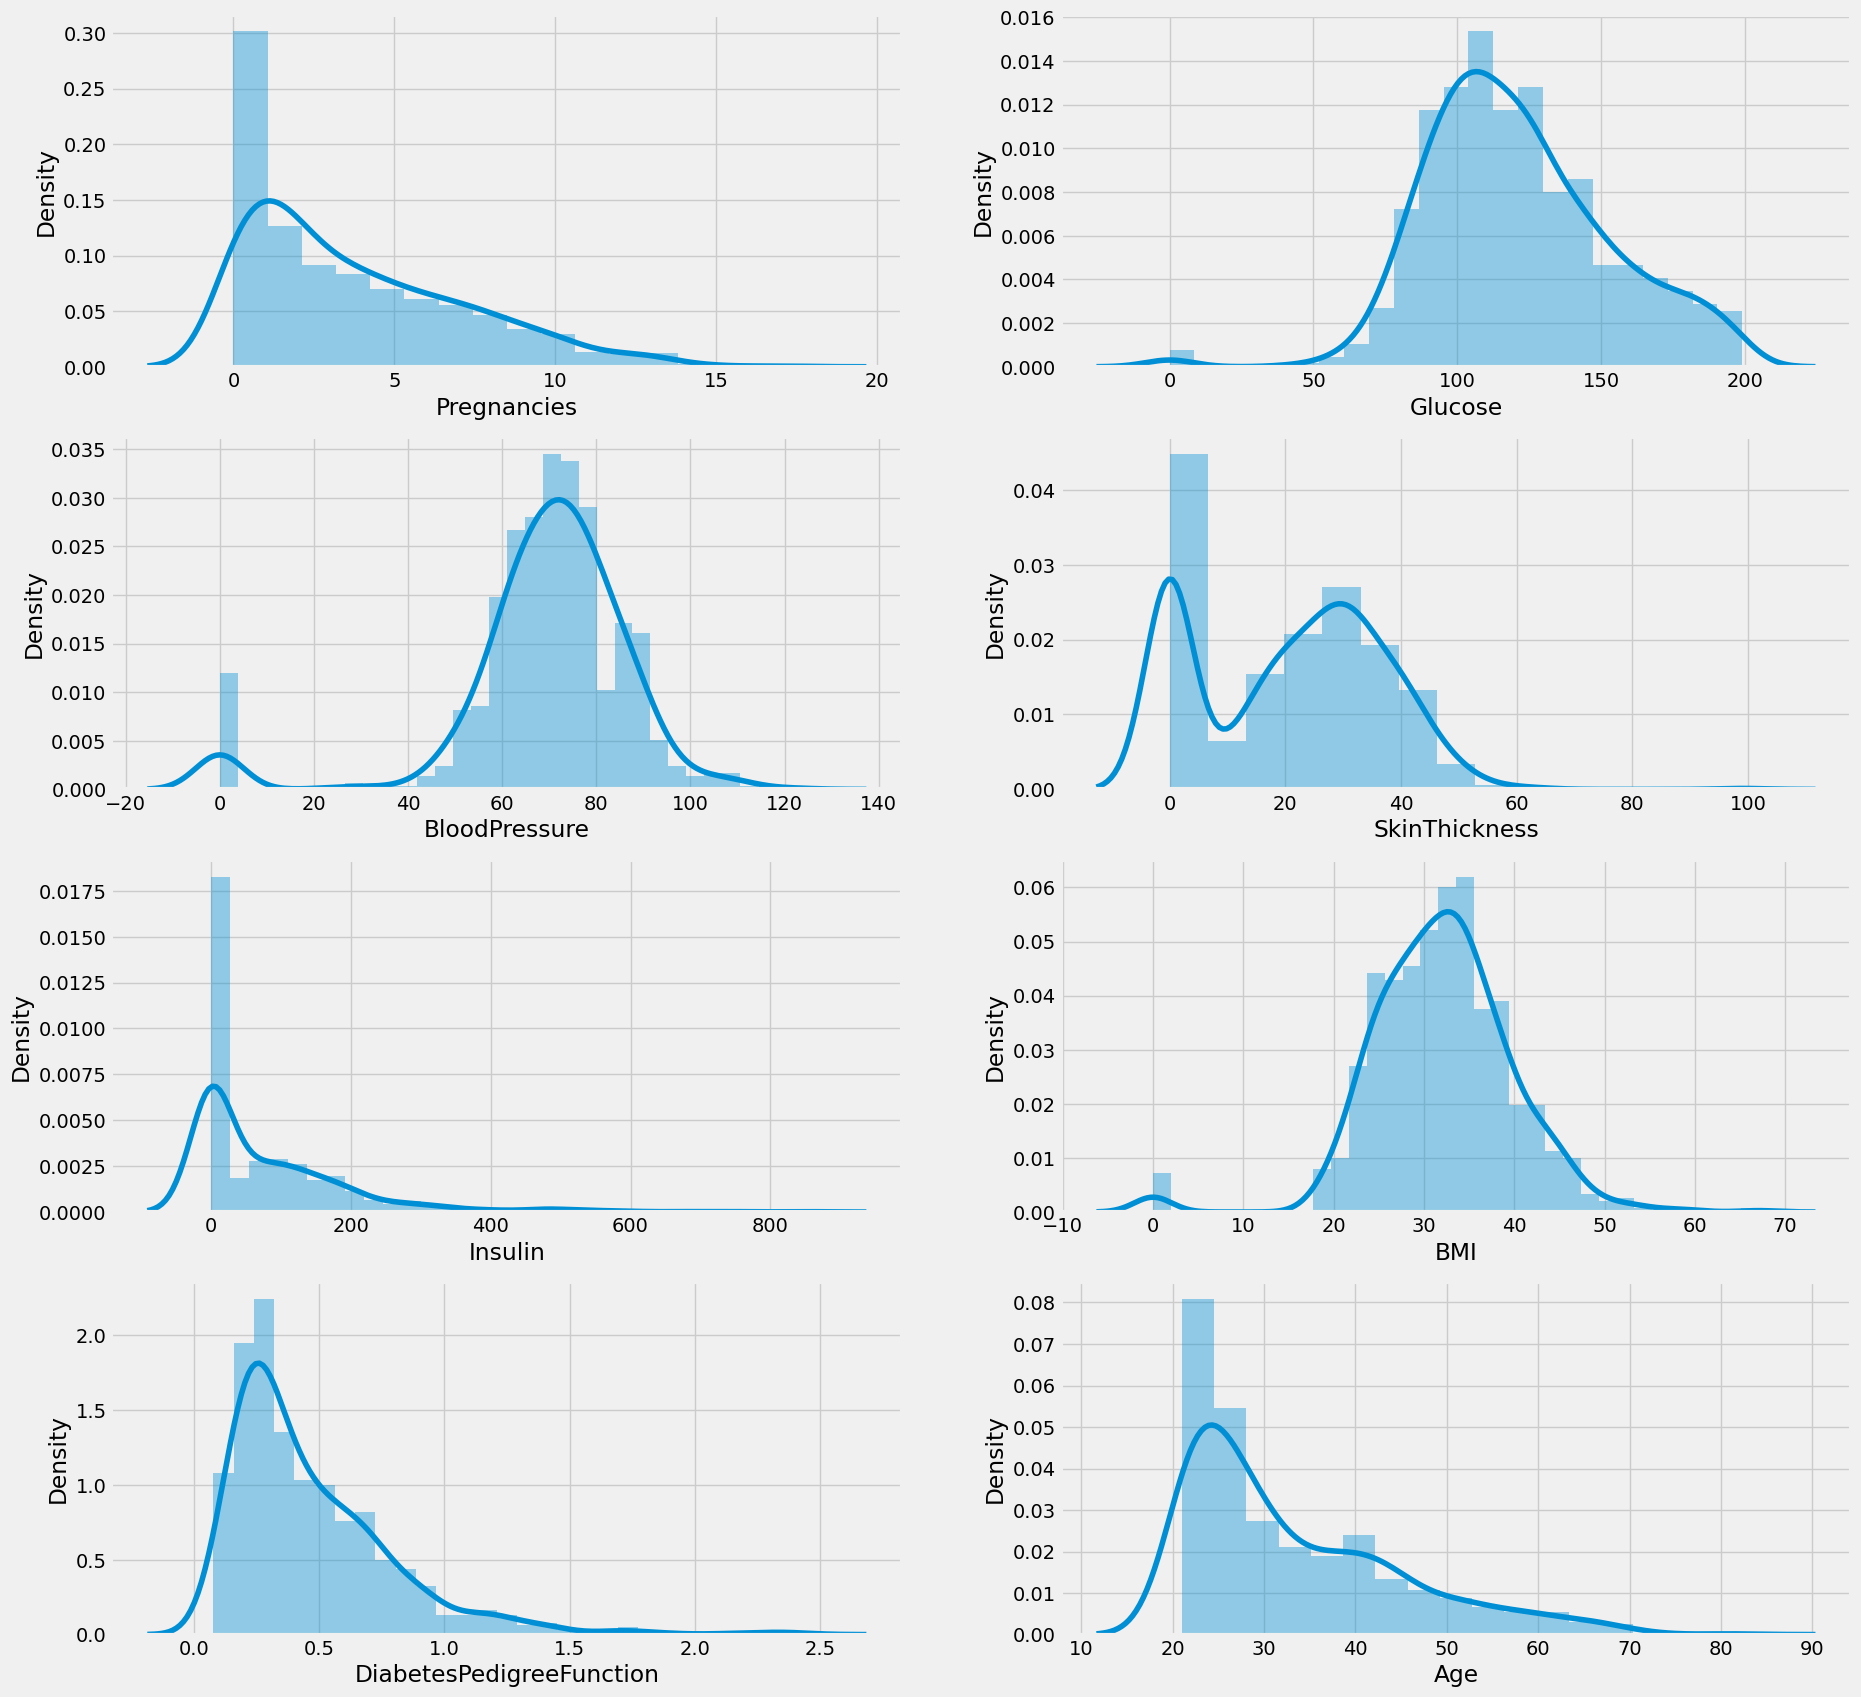

In [ ]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(diabetes_df.Pregnancies, ax=axes[0,0])
sns.distplot(diabetes_df.Glucose, ax=axes[0,1])
sns.distplot(diabetes_df.BloodPressure, ax=axes[1,0])
sns.distplot(diabetes_df.SkinThickness, ax=axes[1,1])
sns.distplot(diabetes_df.Insulin, ax=axes[2,0])
sns.distplot(diabetes_df.BMI, ax=axes[2,1])
sns.distplot(diabetes_df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(diabetes_df.Age, ax=axes[3,1])

###Handling Missing Values

* *Skin Thickness, Insulin, Blood Pressure, Glucose and BMI* had no NaNs but some of the data was encoded as 0s.
* This data was replaced using the median value.

In [ ]:
diabetes_df.SkinThickness.replace(0, diabetes_df.SkinThickness.median(), inplace=True)
diabetes_df.Insulin.replace(0, diabetes_df.Insulin.median(), inplace=True)
diabetes_df.Glucose.replace(0, diabetes_df.Glucose.median(), inplace=True)
diabetes_df.BloodPressure.replace(0, diabetes_df.BloodPressure.median(), inplace=True)
diabetes_df.BMI.replace(0, diabetes_df.BMI.median(), inplace=True)

<ipython-input-12-9d705a048f77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df.SkinThickness.replace(0, diabetes_df.SkinThickness.median(), inplace=True)
<ipython-input-12-9d705a048f77>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

<ipython-input-13-98e0e558ae35>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Pregnancies, ax=axes[0,0])
<ipython-input-13-98e0e558ae35>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df.Glucose, ax=axes[0,1])
<ipython-input-13-98e0e558ae35>:4: UserWarning: 

`distplot`

<Axes: xlabel='Age', ylabel='Density'>

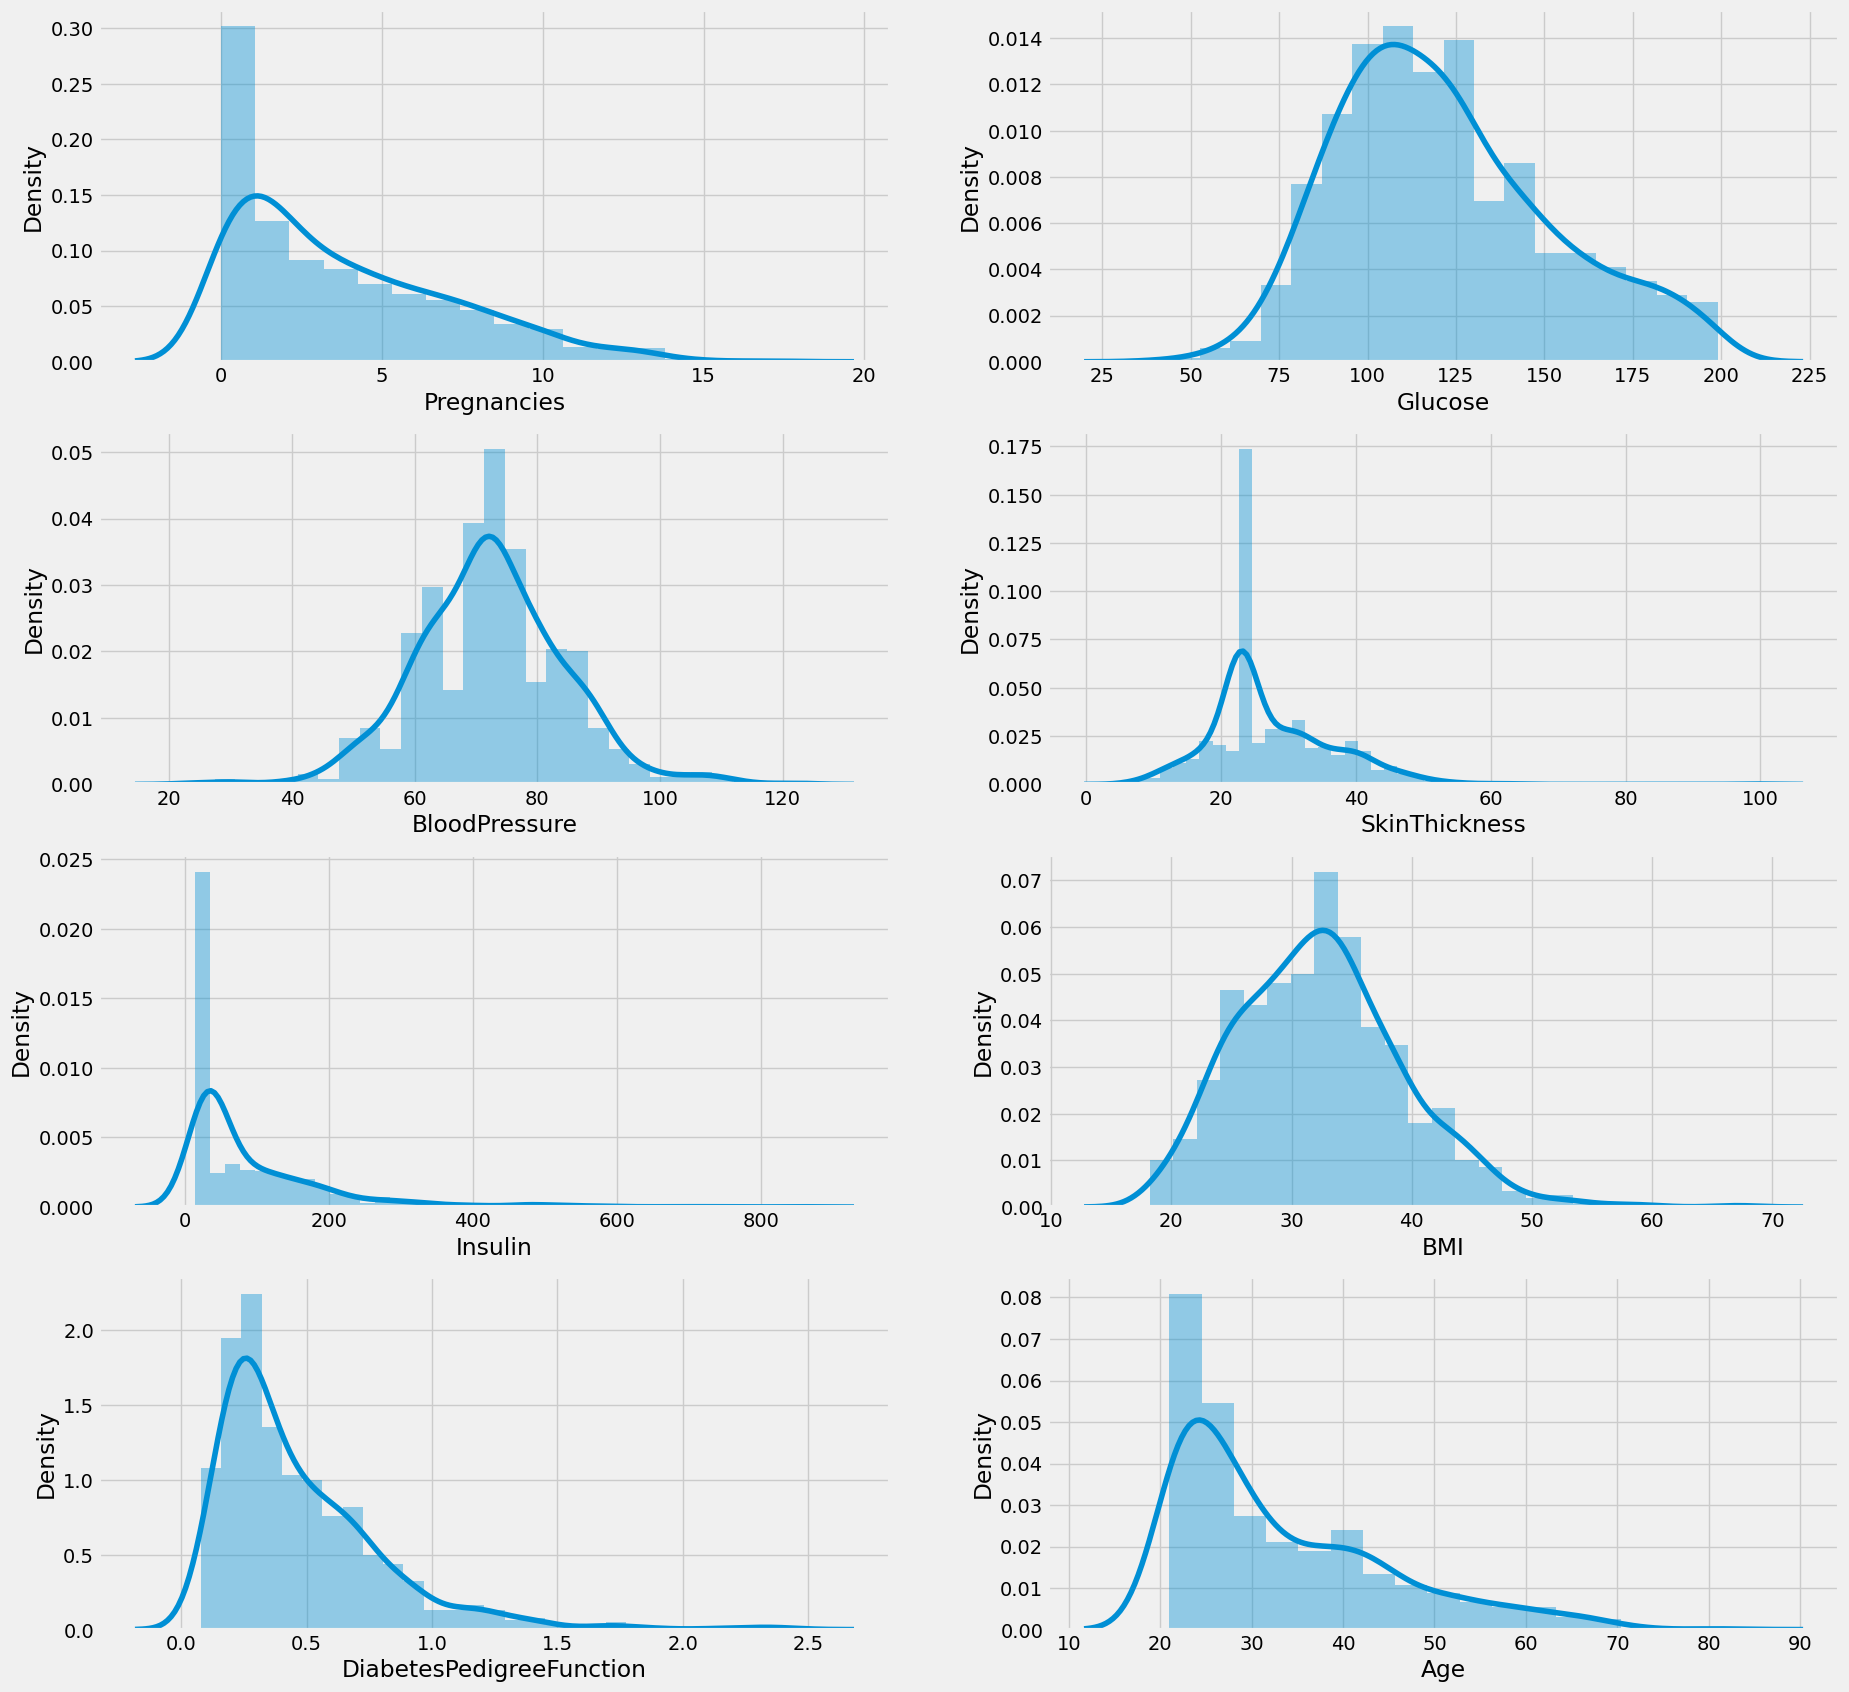

In [ ]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(diabetes_df.Pregnancies, ax=axes[0,0])
sns.distplot(diabetes_df.Glucose, ax=axes[0,1])
sns.distplot(diabetes_df.BloodPressure, ax=axes[1,0])
sns.distplot(diabetes_df.SkinThickness, ax=axes[1,1])
sns.distplot(diabetes_df.Insulin, ax=axes[2,0])
sns.distplot(diabetes_df.BMI, ax=axes[2,1])
sns.distplot(diabetes_df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(diabetes_df.Age, ax=axes[3,1])

## Neural Network

### Preparation of the data
* Split the data into a training set, dev set and test set.
* Normalize the data.

In [ ]:
X = diabetes_df.drop('Outcome', axis =1).values
y = diabetes_df.Outcome.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

### Network arhitecture
* 3 hidden layers.
* Output layer with sigmoid activation.

In [ ]:
def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [ ]:
model = nn()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BC1 (BatchNormalization)             │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Activation1 (Activation)             │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout1 (Dropout)                   │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC2 (Dense)                          │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BC2 (BatchNormalization)             │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Activation2 (Activation)             │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout2 (Dropout)                   │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC3 (Dense)                          │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BC3 (BatchNormalization)             │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout3 (Dropout)                   │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutLayer (Dense)                     │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sigmoid (Activation)                 │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,841 (140.00 KB)

 Trainable params: 35,073 (137.00 KB)

 Non-trainable params: 768 (3.00 KB)

### Compile and fit the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Define callbacks.

In [ ]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_dev, y_dev), callbacks=[reduce_lr, early_stopping], verbose=0)

### Metrics

In [ ]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                                  classification_report(y, y_pred)))


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training set:
	Accuracy:0.780
	Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       345
           1       0.72      0.62      0.67       192

    accuracy                           0.78       537
   macro avg       0.76      0.75      0.75       537
weighted avg       0.78      0.78      0.78       537

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Dev set:
	Accuracy:0.722
	Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        82
           1       0.52      0.52      0.52        33

    accuracy                           0.72       115
   macro avg       0.66      0.66      0.66       115
weighted avg       0.72      0.72      0.72       115

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test set:
	Accuracy:0.681
	Classification Report
              precision    recall  f1-score   support

           0       0.70   

* The classifier showed poor performance while predicting the positive cases in both validation and test set.
* A different architecture or a completely different class of algorithms could be used to gain a performance boost.